c:\Users\devka\anaconda3\envs\exoplanet_prj\lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


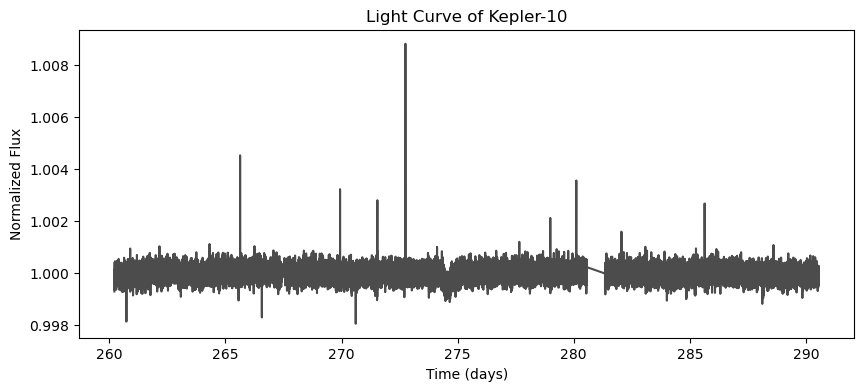

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurve

# Load a sample light curve from Kepler
target = "Kepler-10"  # Example target star
lc = search_lightcurve(target, mission="Kepler", quarter=3).download().remove_nans()

# Normalize flux
lc = lc.normalize()
time, flux = lc.time.value, lc.flux.value

# Plot raw light curve
plt.figure(figsize=(10, 4))
plt.plot(time, flux, 'k', alpha=0.7)
plt.xlabel("Time (days)")
plt.ylabel("Normalized Flux")
plt.title(f"Light Curve of {target}")
plt.show()


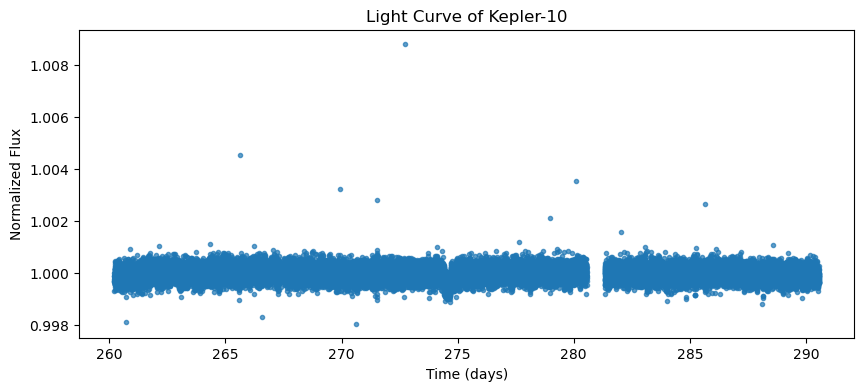

In [3]:
plt.figure(figsize=(10, 4))
plt.scatter(time, flux,marker='.', alpha=0.7)
plt.xlabel("Time (days)")
plt.ylabel("Normalized Flux")
plt.title(f"Light Curve of {target}")
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurve

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image. """
    phase = (time % period) / period  # Normalize to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]
    
    # Ensure flux_sorted length matches (segments * bins)
    total_size = segments * bins
    if len(flux_sorted) > total_size:
        flux_sorted = flux_sorted[:total_size]  # Trim excess
    else:
        flux_sorted = np.interp(np.linspace(0, 1, total_size), np.linspace(0, 1, len(flux_sorted)), flux_sorted)
    
    # Reshape into 2D (segments x bins)
    folded_image = flux_sorted.reshape(segments, bins)
    
    return folded_image

# Load light curve
target = "Kepler-10"
lc = search_lightcurve(target, mission="Kepler", quarter=3).download().remove_nans()
lc = lc.normalize()
time, flux = lc.time.value, lc.flux.value

# Example: Known transit period
transit_period = 2.5
image_2d = phase_fold_2d(time, flux, period=transit_period)

# Plot 2D Phase Folded Image
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect="auto", cmap="viridis", origin="lower")
plt.colorbar(label="Flux")
plt.xlabel("Phase Bin")
plt.ylabel("Cycle")
plt.title(f"2D Phase Folding of {target}")
plt.show()


c:\Users\devka\anaconda3\envs\exoplanet_prj\lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TypeError: cannot write to unmasked output

<Figure size 800x600 with 2 Axes>

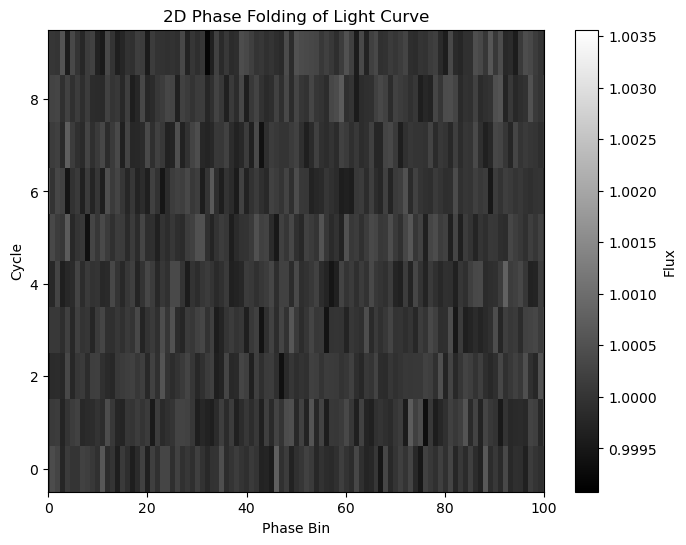

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy array and replace masked values (if any)
image_2d = np.array(image_2d)  # Ensure it's a NumPy array
image_2d = np.nan_to_num(image_2d, nan=0.0)  # Replace NaNs with 0

# Plot 2D Phase Folded Image in Black & White
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect="auto", cmap="gray", origin="lower")
plt.colorbar(label="Flux")
plt.xlim(0,100)
plt.xlabel("Phase Bin")
plt.ylabel("Cycle")
plt.title("2D Phase Folding of Light Curve")
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurve

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image. """
    phase = (time % period) / period  # Normalize to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]
    
    # Ensure flux_sorted length matches (segments * bins)
    total_size = segments * bins
    if len(flux_sorted) > total_size:
        flux_sorted = flux_sorted[:total_size]  # Trim excess
    else:
        flux_sorted = np.interp(np.linspace(0, 1, total_size), np.linspace(0, 1, len(flux_sorted)), flux_sorted)
    
    # Reshape into 2D (segments x bins)
    folded_image = flux_sorted.reshape(segments, bins)
    
    return folded_image

# Load light curve
target = "Kepler-10"
lc = search_lightcurve(target, mission="Kepler", quarter=3).download().remove_nans()
lc = lc.normalize()
time, flux = lc.time.value, lc.flux.value

# Example: Known transit period
transit_period = 0.8373
image_2d = phase_fold_2d(time, flux, period=transit_period)

# Plot 2D Phase Folded Image
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect="auto", cmap="viridis", origin="lower")
plt.colorbar(label="Flux")
plt.xlabel("Phase Bin")
plt.ylabel("Cycle")
plt.title(f"2D Phase Folding of {target}")
plt.show()


c:\Users\devka\anaconda3\envs\exoplanet_prj\lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


TypeError: cannot write to unmasked output

<Figure size 800x600 with 2 Axes>

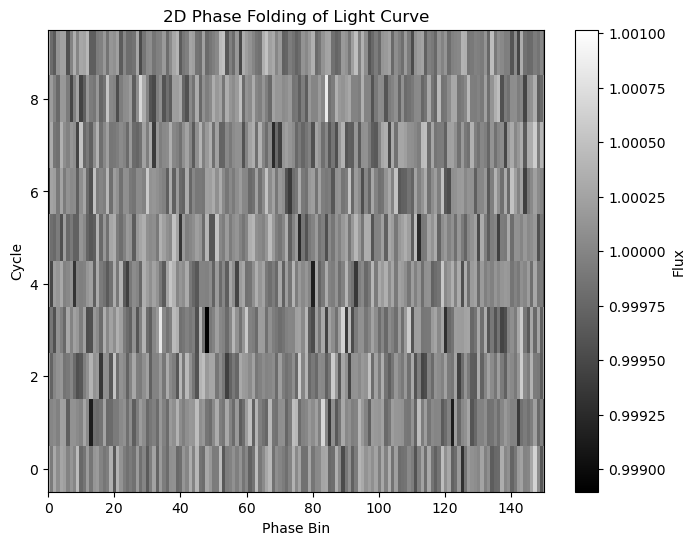

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy array and replace masked values (if any)
image_2d = np.array(image_2d)  # Ensure it's a NumPy array
image_2d = np.nan_to_num(image_2d, nan=0.0)  # Replace NaNs with 0

# Plot 2D Phase Folded Image in Black & White
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect="auto", cmap="gray", origin="lower")
plt.colorbar(label="Flux")
plt.xlim(0,150)
plt.xlabel("Phase Bin")
plt.ylabel("Cycle")
plt.title("2D Phase Folding of Light Curve")
plt.show()


In [8]:
import lightkurve as lk

# Search and download the light curve data for KIC 7051180
search_result = lk.search_lightcurve('KIC 7051180', mission='Kepler')
lc = search_result.download_all().stitch().remove_nans().normalize()


In [9]:
import numpy as np

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """Converts a light curve into a 2D phase-folded image."""
    phase = (time % period) / period  # Normalize to [0, 1]
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    # Ensure flux_sorted length matches (segments * bins)
    total_size = segments * bins
    if len(flux_sorted) > total_size:
        flux_sorted = flux_sorted[:total_size]  # Trim excess
    else:
        flux_sorted = np.interp(
            np.linspace(0, 1, total_size),
            np.linspace(0, 1, len(flux_sorted)),
            flux_sorted
        )

    # Reshape into 2D (segments x bins)
    folded_image = flux_sorted.reshape(segments, bins)
    return folded_image


In [10]:
# Replace 'transit_period' with the actual period of KIC 7051180
transit_period = 3.85  # e.g., 1.234  # Example period in days
image_2d = phase_fold_2d(lc.time.value, lc.flux.value, period=transit_period)


In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title('2D Phase Folding of KIC 7051180')
plt.show()


TypeError: cannot write to unmasked output

<Figure size 800x600 with 2 Axes>

## YES planet

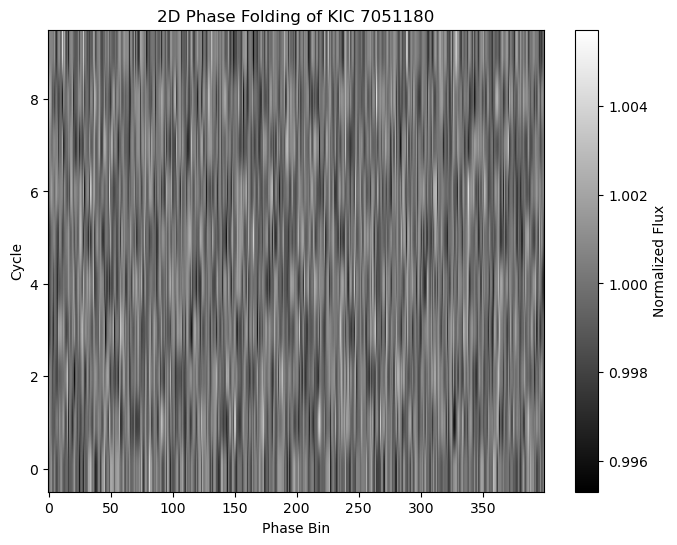

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image. """
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    total_size = segments * bins
    if len(flux_sorted) != total_size:
        print(f"Warning: flux_sorted has {len(flux_sorted)} points, expected {total_size}. Adjusting...")

    flux_sorted = flux_sorted[:total_size]  # Ensure exact length

    try:
        folded_image = flux_sorted.reshape(segments, bins)
    except ValueError as e:
        raise ValueError(f"Reshape error: {e}. Check flux_sorted length.")

    else:
        flux_sorted = np.interp(
            np.linspace(0, 1, total_size),
            np.linspace(0, 1, len(flux_sorted)),
            flux_sorted
        )

    # Reshape into 2D (segments x bins)
    folded_image = flux_sorted.reshape(segments, bins)
    
    return folded_image

# ---- Load Light Curve Data ----
target = "KIC 7051180"  # Change to your desired Kepler target
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 2  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')

plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()



## False positive


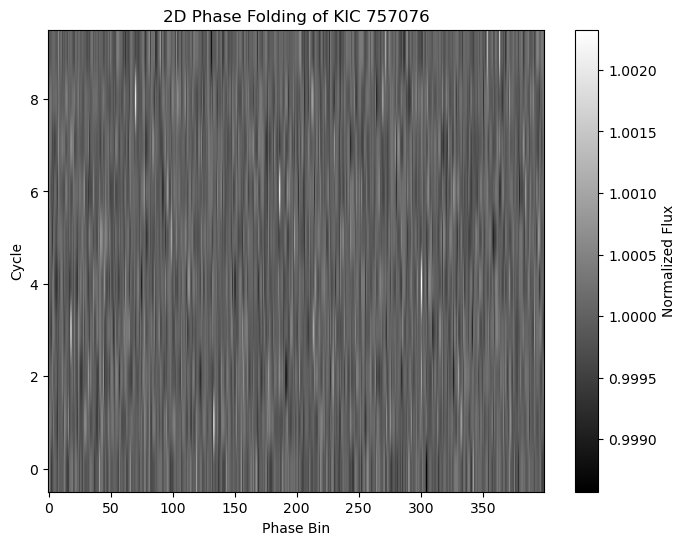

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image. """
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    total_size = segments * bins
    if len(flux_sorted) != total_size:
        print(f"Warning: flux_sorted has {len(flux_sorted)} points, expected {total_size}. Adjusting...")

    flux_sorted = flux_sorted[:total_size]  # Ensure exact length

    try:
        folded_image = flux_sorted.reshape(segments, bins)
    except ValueError as e:
        raise ValueError(f"Reshape error: {e}. Check flux_sorted length.")

    else:
        flux_sorted = np.interp(
            np.linspace(0, 1, total_size),
            np.linspace(0, 1, len(flux_sorted)),
            flux_sorted
        )

    # Reshape into 2D (segments x bins)
    folded_image = flux_sorted.reshape(segments, bins)
    
    return folded_image

# ---- Load Light Curve Data ----
target = "KIC 757076"
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 1.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()



In [14]:
print(flux_sorted.shape)  


NameError: name 'flux_sorted' is not defined

## No Planet

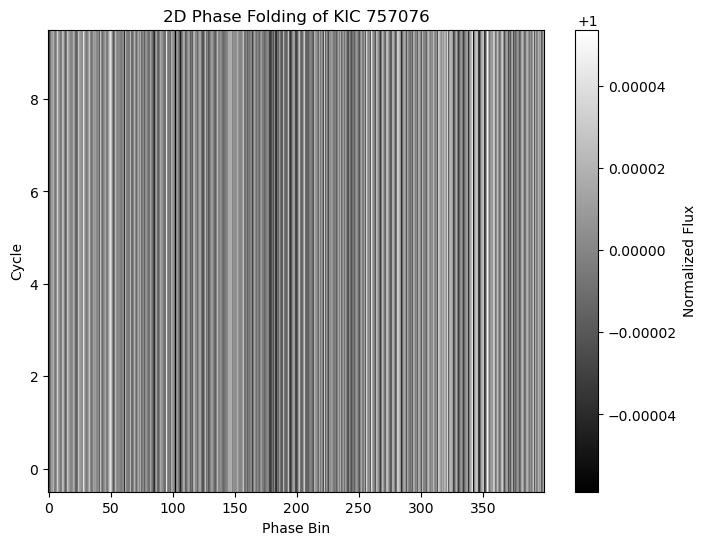

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import numpy as np

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image with correct binning. """
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    total_size = segments * bins

    # 🔥 Fix: Proper binning instead of truncation
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_indices = np.digitize(phase_sorted, bin_edges) - 1  # Assign each point to a bin
    binned_flux = np.zeros(bins)
    binned_counts = np.zeros(bins)

    for i in range(len(flux_sorted)):
        bin_idx = bin_indices[i]
        if 0 <= bin_idx < bins:
            binned_flux[bin_idx] += flux_sorted[i]
            binned_counts[bin_idx] += 1

    # Avoid division by zero
    binned_flux /= np.maximum(binned_counts, 1)

    # 🔥 Fix: Tile the binned flux into `segments` for reshaping
    flux_repeated = np.tile(binned_flux, segments)

    # Reshape into 2D (segments x bins)
    folded_image = flux_repeated.reshape(segments, bins)
    
    return folded_image


# ---- Load Light Curve Data ----
target = "KIC 757076"
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 1.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()



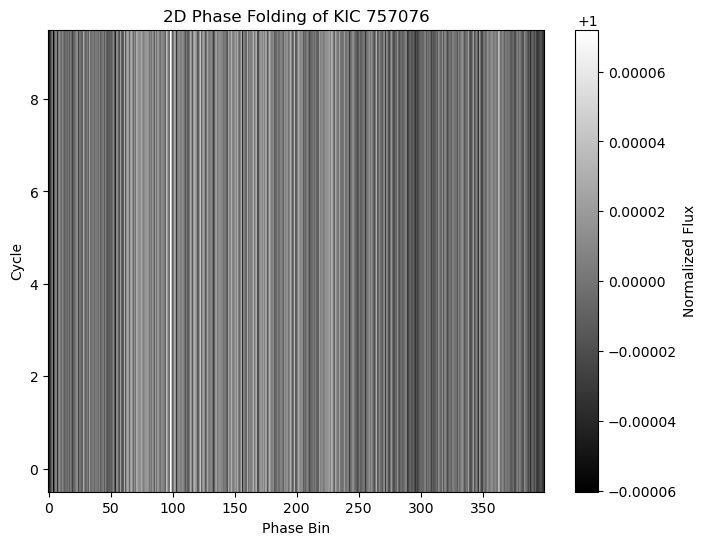

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import numpy as np

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image with correct binning. """
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    total_size = segments * bins

    # 🔥 Fix: Proper binning instead of truncation
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_indices = np.digitize(phase_sorted, bin_edges) - 1  # Assign each point to a bin
    binned_flux = np.zeros(bins)
    binned_counts = np.zeros(bins)

    for i in range(len(flux_sorted)):
        bin_idx = bin_indices[i]
        if 0 <= bin_idx < bins:
            binned_flux[bin_idx] += flux_sorted[i]
            binned_counts[bin_idx] += 1

    # Avoid division by zero
    binned_flux /= np.maximum(binned_counts, 1)

    # 🔥 Fix: Tile the binned flux into `segments` for reshaping
    flux_repeated = np.tile(binned_flux, segments)

    # Reshape into 2D (segments x bins)
    folded_image = flux_repeated.reshape(segments, bins)
    
    return folded_image


# ---- Load Light Curve Data ----
target = "KIC 757076"
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 2.85 # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()



## Yes Planet


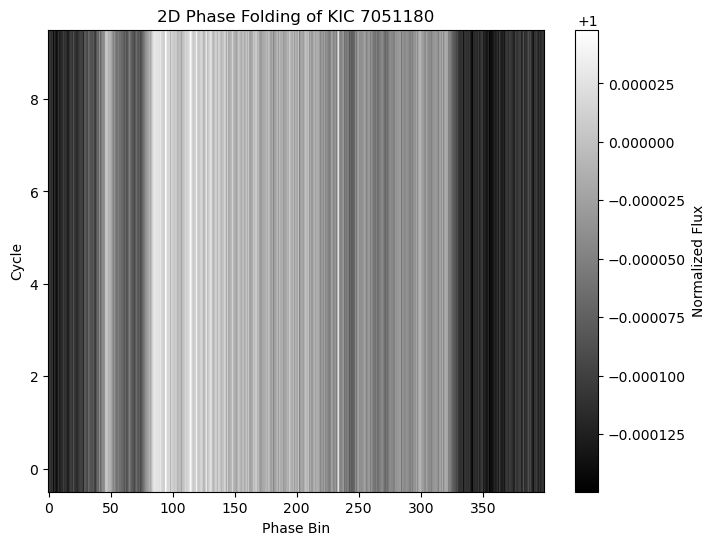

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

import numpy as np

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """ Converts light curve into a 2D phase-folded image with correct binning. """
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Sort by phase
    sorted_idx = np.argsort(phase)
    phase_sorted, flux_sorted = phase[sorted_idx], flux[sorted_idx]

    total_size = segments * bins

    # 🔥 Fix: Proper binning instead of truncation
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_indices = np.digitize(phase_sorted, bin_edges) - 1  # Assign each point to a bin
    binned_flux = np.zeros(bins)
    binned_counts = np.zeros(bins)

    for i in range(len(flux_sorted)):
        bin_idx = bin_indices[i]
        if 0 <= bin_idx < bins:
            binned_flux[bin_idx] += flux_sorted[i]
            binned_counts[bin_idx] += 1

    # Avoid division by zero
    binned_flux /= np.maximum(binned_counts, 1)

    # 🔥 Fix: Tile the binned flux into `segments` for reshaping
    flux_repeated = np.tile(binned_flux, segments)

    # Reshape into 2D (segments x bins)
    folded_image = flux_repeated.reshape(segments, bins)
    
    return folded_image


# ---- Load Light Curve Data ----
target = "KIC 7051180"  # Change to your desired Kepler target
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 1.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()



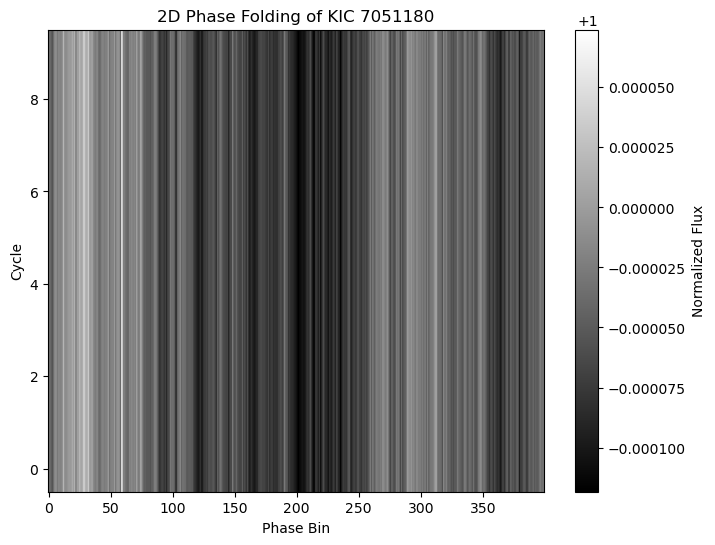

In [19]:
transit_period = 3.25 # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

import numpy as np

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)


if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()

- The phase is calculated by taking the modulo of the period, so each transit event appears in the same phase cycle.
- Identifies the Relative Position Within a Period
- Sorts the flux values according to phase so the phase-folded light curve is aligned properly.
- Divides the phase into bins=400 equal parts.
- After phase-folding, you have a continuous distribution of flux values over phase (0 to 1).
- Instead of handling every single data point, binning groups the phase values into discrete intervals.
- This reduces noise and makes the transit signal clearer.
- bin=400
- Each bin accumulates flux values.
- The sum is then divided by the count to get the mean flux per bin.
- This reduces fluctuations in flux and enhances transit detection.

- Once we have binned flux values, we need to repeat them across multiple rows to form a 2D image.

- Planet

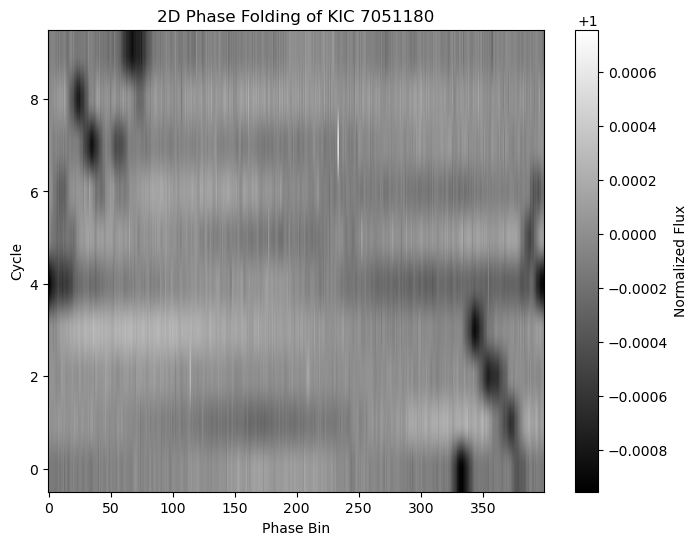

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """Converts light curve into a 2D phase-folded image with correct binning."""
    
    # Compute phase
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Split data into `segments` sequentially
    segment_size = len(time) // segments
    folded_image = np.zeros((segments, bins))
    
    for i in range(segments):
        # Extract a segment of the data
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < segments - 1 else len(time)
        
        segment_phase = phase[start_idx:end_idx]
        segment_flux = flux[start_idx:end_idx]
        
        # Sort by phase
        sorted_idx = np.argsort(segment_phase)
        segment_phase_sorted = segment_phase[sorted_idx]
        segment_flux_sorted = segment_flux[sorted_idx]
        
        # Bin flux in this segment
        bin_edges = np.linspace(0, 1, bins + 1)
        bin_indices = np.digitize(segment_phase_sorted, bin_edges) - 1
        
        binned_flux = np.zeros(bins)
        binned_counts = np.zeros(bins)
        
        for j in range(len(segment_flux_sorted)):
            bin_idx = bin_indices[j]
            if 0 <= bin_idx < bins:
                binned_flux[bin_idx] += segment_flux_sorted[j]
                binned_counts[bin_idx] += 1
        
        # Avoid division by zero
        binned_flux /= np.maximum(binned_counts, 1)
        
        # Store in 2D array
        folded_image[i, :] = binned_flux
    
    return folded_image

# ---- Load Light Curve Data ----
target = "KIC 7051180"  # Change to your desired Kepler target
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 1.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)

if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()


- Planet with random period

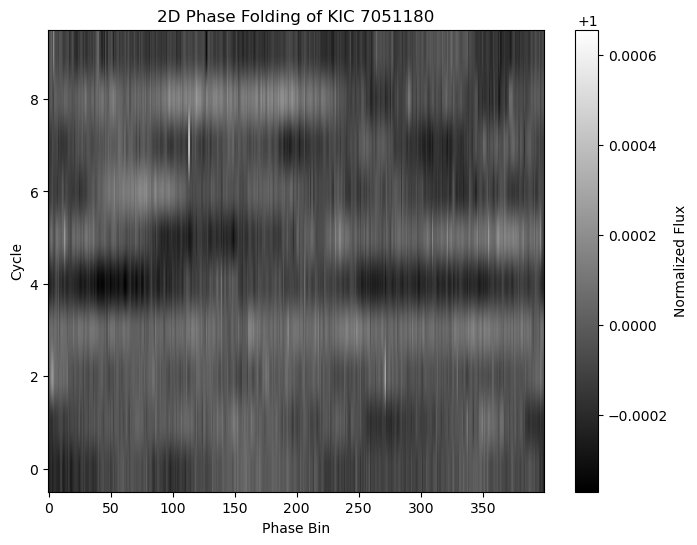

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """Converts light curve into a 2D phase-folded image with correct binning."""
    
    # Compute phase
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Split data into `segments` sequentially
    segment_size = len(time) // segments
    folded_image = np.zeros((segments, bins))
    
    for i in range(segments):
        # Extract a segment of the data
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < segments - 1 else len(time)
        
        segment_phase = phase[start_idx:end_idx]
        segment_flux = flux[start_idx:end_idx]
        
        # Sort by phase
        sorted_idx = np.argsort(segment_phase)
        segment_phase_sorted = segment_phase[sorted_idx]
        segment_flux_sorted = segment_flux[sorted_idx]
        
        # Bin flux in this segment
        bin_edges = np.linspace(0, 1, bins + 1)
        bin_indices = np.digitize(segment_phase_sorted, bin_edges) - 1
        
        binned_flux = np.zeros(bins)
        binned_counts = np.zeros(bins)
        
        for j in range(len(segment_flux_sorted)):
            bin_idx = bin_indices[j]
            if 0 <= bin_idx < bins:
                binned_flux[bin_idx] += segment_flux_sorted[j]
                binned_counts[bin_idx] += 1
        
        # Avoid division by zero
        binned_flux /= np.maximum(binned_counts, 1)
        
        # Store in 2D array
        folded_image[i, :] = binned_flux
    
    return folded_image

# ---- Load Light Curve Data ----
target = "KIC 7051180"  # Change to your desired Kepler target
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 2.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)

if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()


- No Planet

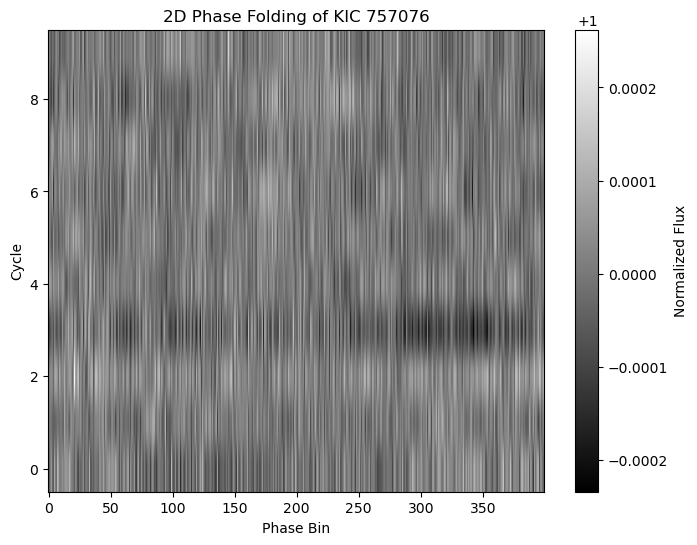

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk

def phase_fold_2d(time, flux, period, bins=400, segments=10):
    """Converts light curve into a 2D phase-folded image with correct binning."""
    
    # Compute phase
    phase = (time % period) / period  # Normalize phase to [0, 1]
    
    # Split data into `segments` sequentially
    segment_size = len(time) // segments
    folded_image = np.zeros((segments, bins))
    
    for i in range(segments):
        # Extract a segment of the data
        start_idx = i * segment_size
        end_idx = (i + 1) * segment_size if i < segments - 1 else len(time)
        
        segment_phase = phase[start_idx:end_idx]
        segment_flux = flux[start_idx:end_idx]
        
        # Sort by phase
        sorted_idx = np.argsort(segment_phase)
        segment_phase_sorted = segment_phase[sorted_idx]
        segment_flux_sorted = segment_flux[sorted_idx]
        
        # Bin flux in this segment
        bin_edges = np.linspace(0, 1, bins + 1)
        bin_indices = np.digitize(segment_phase_sorted, bin_edges) - 1
        
        binned_flux = np.zeros(bins)
        binned_counts = np.zeros(bins)
        
        for j in range(len(segment_flux_sorted)):
            bin_idx = bin_indices[j]
            if 0 <= bin_idx < bins:
                binned_flux[bin_idx] += segment_flux_sorted[j]
                binned_counts[bin_idx] += 1
        
        # Avoid division by zero
        binned_flux /= np.maximum(binned_counts, 1)
        
        # Store in 2D array
        folded_image[i, :] = binned_flux
    
    return folded_image

# ---- Load Light Curve Data ----
target = "KIC 757076"
search_result = lk.search_lightcurve(target, mission="Kepler")
lc = search_result.download_all().stitch().remove_nans().normalize()
if lc is None or len(lc.time) == 0:
    raise ValueError("No light curve data found! Check the target name and data availability.")

time, flux = lc.time.value, lc.flux.value

# ---- Phase Folded 2D Image ----
transit_period = 2.95  # Replace with the actual period of the exoplanet
image_2d = phase_fold_2d(time, flux, period=transit_period)

# Replace NaNs and Infs with zeros
image_2d = np.nan_to_num(image_2d, nan=0.0, posinf=0.0, neginf=0.0)

if not np.all(np.isfinite(image_2d)):
    raise ValueError("Non-finite values detected in the phase-folded image!")

# ---- Plot 2D Phase Folded Image ----
plt.figure(figsize=(8, 6))
plt.imshow(image_2d, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(label='Normalized Flux')
plt.xlabel('Phase Bin')
plt.ylabel('Cycle')
plt.title(f'2D Phase Folding of {target}')
plt.show()
